## Supuestos estructurales del Modelo Clásico de Regresión Lineal (MCRL)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

In [ ]:
data=pd.read_csv("/content/GujaratiPorter71.txt", delimiter="\t")
data.head()

,CM,FLR,PGNP,TFR
0,128,37,1870,6.66
1,204,22,130,6.15
2,202,16,310,7.00
3,197,65,570,6.25
4,96,76,2050,3.81


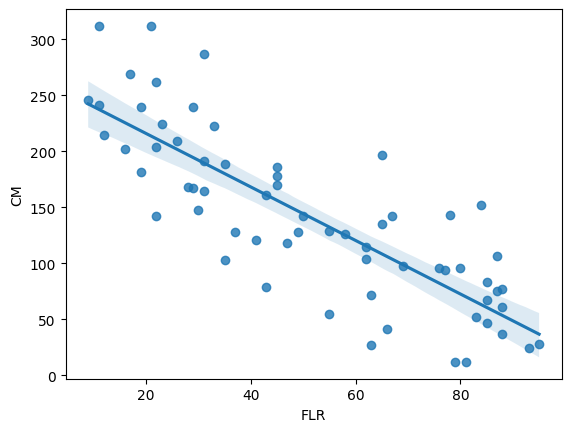

In [ ]:
sns.regplot(x = data["FLR"], y = data["CM"]);

**Supuesto #6: Observaciones mayores a parámetros**

In [ ]:
data.shape

(64, 4)

In [ ]:
data["CM"][0:3]

0    128
1    204
2    202
Name: CM, dtype: int64

In [ ]:
data[["FLR","PGNP","TFR"]][0:3]

,FLR,PGNP,TFR
0,37,1870,6.66
1,22,130,6.15
2,16,310,7.00


In [ ]:
modelo_prueba = sm.OLS(data["CM"][0:3], data[["FLR","PGNP","TFR"]][0:3])
resultado_prueba = modelo_prueba.fit()
print(resultado_prueba.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 30 Sep 2023   Prob (F-statistic):                nan
Time:                        16:13:21   Log-Likelihood:                 86.472
No. Observations:                   3   AIC:                            -166.9
Df Residuals:                       0   BIC:                            -169.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FLR            2.0913        inf          0        n

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


**Supuesto #7: Variabilidad en las variables**

In [ ]:
sm.add_constant(data).apply(np.std, axis= 0)

const       0.000000
CM         75.382151
FLR        25.803873
PGNP     2704.317439
TFR         1.497158
dtype: float64

In [ ]:
pd.DataFrame(sm.add_constant(data).apply(np.std, axis= 0),columns=["STD"])

,STD
const,0.000000
CM,75.382151
FLR,25.803873
PGNP,2704.317439
TFR,1.497158


**Supuesto #8: Multicolinealidad**

In [ ]:
data.corr()

,CM,FLR,PGNP,TFR
CM,1.000000,-0.818285,-0.407697,0.671135
FLR,-0.818285,1.000000,0.268530,-0.625954
PGNP,-0.407697,0.268530,1.000000,-0.185718
TFR,0.671135,-0.625954,-0.185718,1.000000


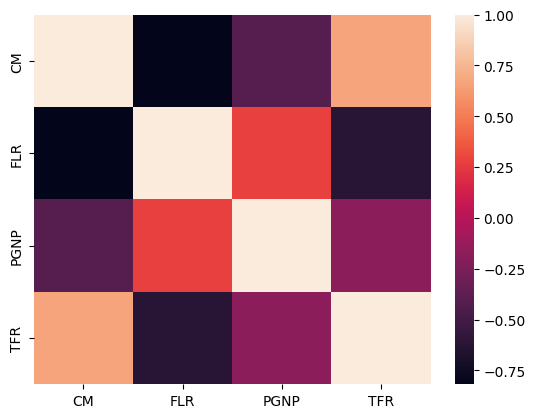

In [ ]:
correlaciones=data.corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones)
plt.show()

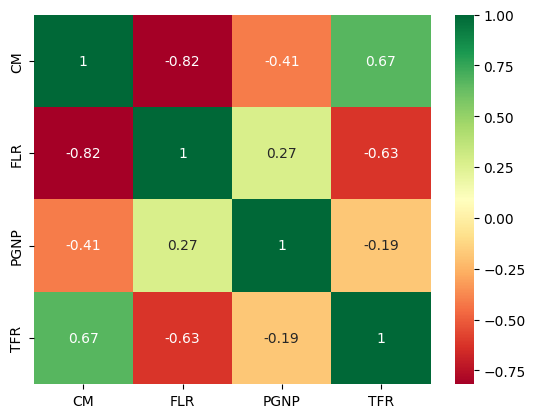

In [ ]:
correlaciones=data.corr()
fig,ax=plt.subplots()
sns.heatmap(correlaciones, cmap = "RdYlGn", annot = True)
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["Nombre"] = data.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
print(vif_data)

  Nombre        VIF
0     CM  12.465787
1    FLR   3.937469
2   PGNP   1.494594
3    TFR  20.210255


**Supuesto de no sesgo de especificación**

In [ ]:
modelo1=sm.OLS(data["CM"],sm.add_constant(data[["FLR","PGNP","TFR"]]))
resultados1=modelo1.fit()
print(resultados1.summary())

                            OLS Regression Results                            
Dep. Variable:                     CM   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     59.17
Date:                Sat, 30 Sep 2023   Prob (F-statistic):           6.46e-18
Time:                        16:13:56   Log-Likelihood:                -323.43
No. Observations:                  64   AIC:                             654.9
Df Residuals:                      60   BIC:                             663.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        168.3067     32.892      5.117      0.0

In [ ]:
valores_estimados=resultados1.predict
residuos = resultados1.resid

In [ ]:
# Prueba CUSUM para medir cambio estructural
# (para probar si los coeficientes en un modelo son constantes)

resultados_CUSUM = sms.breaks_cusumolsresid(residuos)
print(resultados_CUSUM)

(0.4036665816273897, 0.9968015398003419, [(1, 1.63), (5, 1.36), (10, 1.22)])


In [ ]:
# Para evaluar si la forma funcional es la correcta se utiliza el test de RESET de Ramsey

resultados_RESET = sms._________(__________)
estadistico = _____________.___________
p_valor = ___________.________

nombres = ["Estadístico","p-valor"]
pd.DataFrame([_________,_________], index = __________, columns = [________])

## Ejercicio

Realice un modelo de regresión lineal con la base de datos Ingreso_Ahorro; adicionalmente, verifique el cumplimiento de los supuesto vistos en clase.

Este archivo de datos contiene información sobre 26 automóviles, a saber, su marca, precio, millas por galón, calificación de reparación (en 1978), peso en libras, longitud en pulgadas y si el automóvil era extranjero o nacional. Aquí está el archivo de datos.

In [ ]:
datos_ejercicio=pd.read_csv("regression_auto.csv")

In [ ]:
sns._____________(x="_______", y="________", data=___________)

In [ ]:
sns.__________(x="_______", y="________", hue="_______", kind="_________", data=___________)

### Modificación de bases de datos

In [ ]:
datos_modificados = ___________.loc[(___________________) & (_________________)]